In [1]:
from process import *
from calculate import *
from plots import *
from envelopes import *
from supports import *
from plotsettings import *

import numpy as np
import pickle as pkl
import matplotlib.pyplot as plt

src = "/home/jovyan/jupyterhub-shared/Wouter/simulation_data/"

In [2]:
A = src + "data_200223_175959_res_cond_wsb0.0037"
B = src + "data_200223_185233_res_cond_wsb0.004"
C = src + "data_200223_190842_res_cond_wsb0.0049"
D = src + "data_200223_192609_res_cond_wsb0.0061"
E = src + "data_200223_194306_res_cond_wsb0.0075"
F = src + "data_200223_200510_res_cond_wsb0.0089"

In [3]:
quants = ['times', 'expect', 'e0', 'g1', 'e1', 'g0']
Atimes, _, _, _, _, Ae1, Ag0, _ = load_data(quants, A)
Btimes, _, _, _, _, Be1, Bg0, _ = load_data(quants, B)
Ctimes, _, _, _, _, Ce1, Cg0, _ = load_data(quants, C)
Dtimes, _, _, _, _, De1, Dg0, _ = load_data(quants, D)
Etimes, _, _, _, _, Ee1, Eg0, _ = load_data(quants, E)
Ftimes, _, _, _, _, Fe1, Fg0, _ = load_data(quants, F)

In [4]:
infile = open(src + "chevron_data_200224_060953", 'rb')
data = pkl.load(infile)
wd_list = data['wd_list']
expect_q = data['expect_q']
expect_c = data['expect_c']
g0 = data['g0']
e0 = data['e0']
e1 = data['e1']
e1g0 = np.asarray(e1) - np.asarray(g0)
wd_list  = np.linspace(5.2118, 5.2198, 81) *2*pi

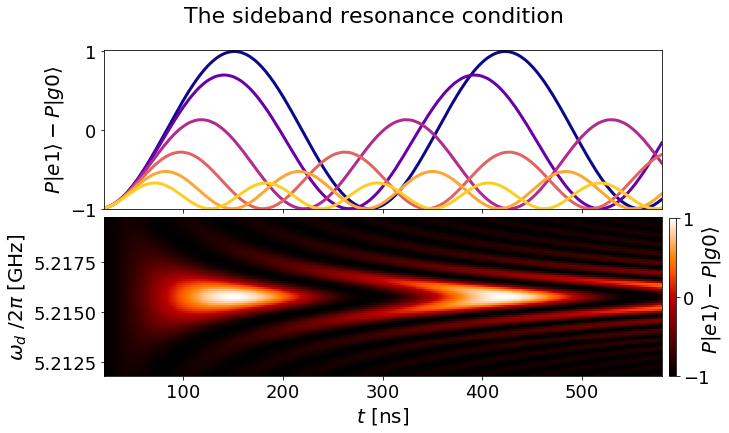

In [21]:
cols = plt.cm.plasma([0, 0.2, 0.4, 0.6, 0.8, 0.9]) 

fig, _ = plt.subplots(2, 1, figsize=(10,6))
plt.suptitle("The sideband resonance condition")

plt.subplot(2, 1, 1)
plt.plot(Atimes,Ae1-Ag0, ls=linestyles['larger'], c=cols[0], lw=3)
plt.plot(Btimes,Be1-Bg0, ls=linestyles['larger'], c=cols[1], lw=3)
plt.plot(Ctimes,Ce1-Cg0, ls=linestyles['larger'], c=cols[2], lw=3)
plt.plot(Dtimes,De1-Dg0, ls=linestyles['larger'], c=cols[3], lw=3)
plt.plot(Etimes,Ee1-Eg0, ls=linestyles['larger'], c=cols[4], lw=3)
plt.plot(Ftimes,Fe1-Fg0, ls=linestyles['larger'], c=cols[5], lw=3)

plt.xlim([20, 580])
plt.ylim([-1, 1.02])
plt.gca().set_xticklabels([])
plt.ylabel("$P\\left|e1\\right> - P\\left|g0\\right>$")

plt.subplot(2, 1, 2)
chev = plt.pcolor(np.linspace(20, 580, 580), wd_list/2/pi, np.asarray(e1g0), cmap='gist_heat')
plt.clim(-1, 1)
plt.ylabel("$\\omega_d$ $/2\\pi$ [GHz]")
plt.xlabel("$t$ [ns]")

cb_ax = fig.add_axes([0.91, 0.125, 0.01, 0.365])
cbar = fig.colorbar(chev, cax=cb_ax)
cbar.set_ticks([-1, 0, 1])
cbar.set_label("$P\\left|e1\\right> - P\\left|g0\\right>$", labelpad=-10, y=0.55, rotation=90)

plt.subplots_adjust(hspace=0.05)
plt.show()